## Pymaceurical Inc.

## Analysis
## In this analysis, I looked at data for anti-cancer medication. This data came from a study that experiments with mice that have tumors. These mice were given treatments to see if they had any affect on the tumors. Based on the data, I have come up with three conlcusions.

## My first conclusion is that the drugs called "Capomulin" and "Ramicane" seem to be the most effective drug against the tumors. There is a lot of data in here that supports this conlusion. When looking at the mean and median tumor volume based on drugs, capomulin and ramicane were the lowest, both coming in at around 40 mm3. While every other drug had around 50 mm3. Another example is in the box plot, where the distribution of tumor volume for capomulin and ramicane is far lower than the other two drugs. I even added a line graph with one mouse taking capomulin. It shows how much the tumor volume decreased over the series of timepoints.

## Another conclusion I was able to draw from this data is that there is a correlation between mice weight and tumor volume. When looking at the scatter plots I created, there is an obvious trend that can be spotted. As the mice weight increases, so does the tumor volume. This could suggest that not only do drugs have an affect on tumor size, but also overall health.

## The final conlclusion I was able to draw from this data is that the other drugs aside from capomulin and ramicane seem to not have any real effect at all. When looking at the summary statistics, the placebo regimen almost had the same mean and median as all of the other drugs asides from the two named before. Even the std and variance is not that different from the other drugs. This suggest that these other drugs are not very effective as fighting tumors.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
pym_df = pd.merge(mouse_metadata_df, study_results_df, how="right")
# Display the data table for preview
pym_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
mice_count = pym_df["Mouse ID"].nunique()
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
duplicate_mice = pym_df[pym_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = "g989"
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pym_df[pym_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_value = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['sem'])

summary_df = pd.DataFrame({'Mean': mean, 
                           'Median': median, 
                           'Variance': variance, 
                           'Standard Deviation': std,
                           'SEM': sem_value['sem']})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_df.columns = ['Mean', 'Median', 'Variance', 'Std', 'SEM']
summary_stats_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts 

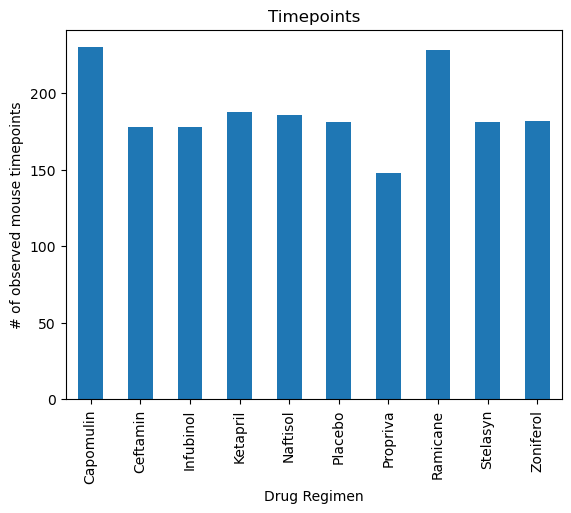

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df.groupby("Drug Regimen").size()
drug_regimen.plot(kind='bar', title='Timepoints')
plt.ylabel('# of observed mouse timepoints')
plt.show()

In [21]:
drug_regimen = clean_df.groupby("Drug Regimen").size()
drug_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

Text(0, 0.5, 'Timepoints')

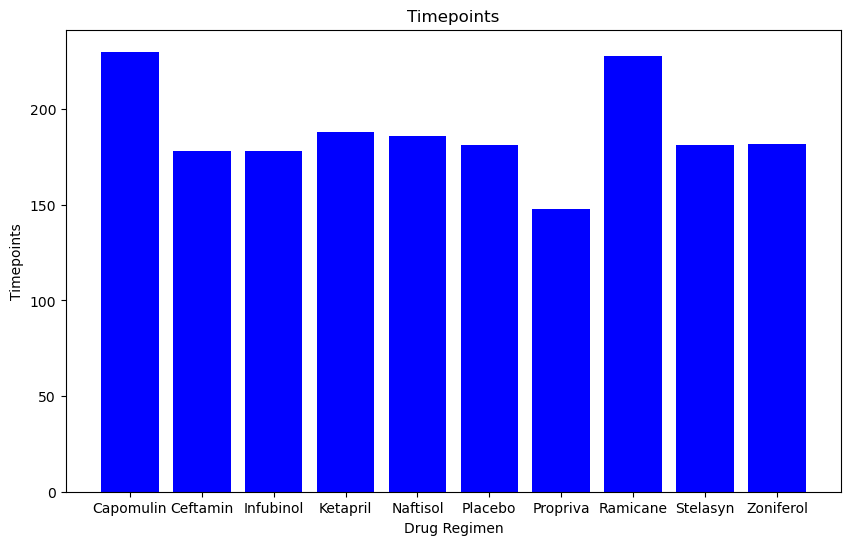

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
        "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.figure(figsize=(10, 6))
plt.bar(drug, timepoints, facecolor='blue', alpha=1, align='center')
plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


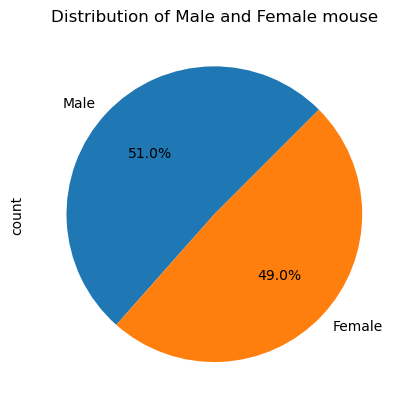

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mouse_gender = clean_df['Sex'].value_counts()
mouse_gender
# Get the unique mice with their gender
mouse_gender.plot.pie(autopct='%1.1f%%', startangle=45, title='Distribution of Male and Female mouse')

# Make the pie chart
plt.show()

In [27]:
mouse_gender = clean_df['Sex'].value_counts()
mouse_gender

Sex
Male      958
Female    922
Name: count, dtype: int64

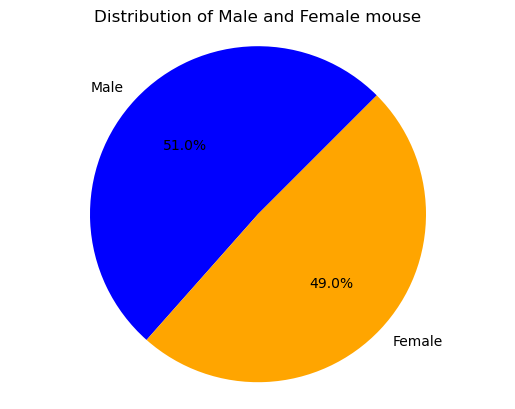

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender = ['Male', 'Female']
mouse_count = [958, 922]
colors = ['blue', 'orange']

total_mouse = sum(mouse_count)
percentages = [(count/total_mouse) * 100 for count in mouse_count]
# Get the unique mice with their gender
plt.pie(percentages, labels=gender, colors=colors, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Male and Female mouse')
plt.axis('equal')

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume = pd.merge(final_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25,.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q - (1.5 * iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    


    # add subset
    

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

print(f"Potential outliers for {'Capomulin'}: {outliers}")
print(f"Potential outliers for {'Ramicane'}: {outliers}")
print(f"Potential outliers for {'Infubinol'}: {outliers}")
print(f"Potential outliers for {'Ceftamin'}: {outliers}")

Potential outliers for Capomulin: 3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
P

<Figure size 1000x600 with 0 Axes>

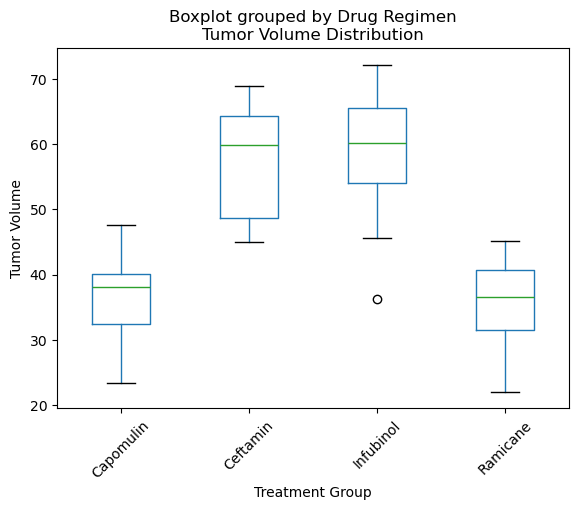

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
final_tumor_volume.boxplot(column = 'Tumor Volume (mm3)', by='Drug Regimen')
plt.title('Tumor Volume Distribution')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## Line and Scatter Plots

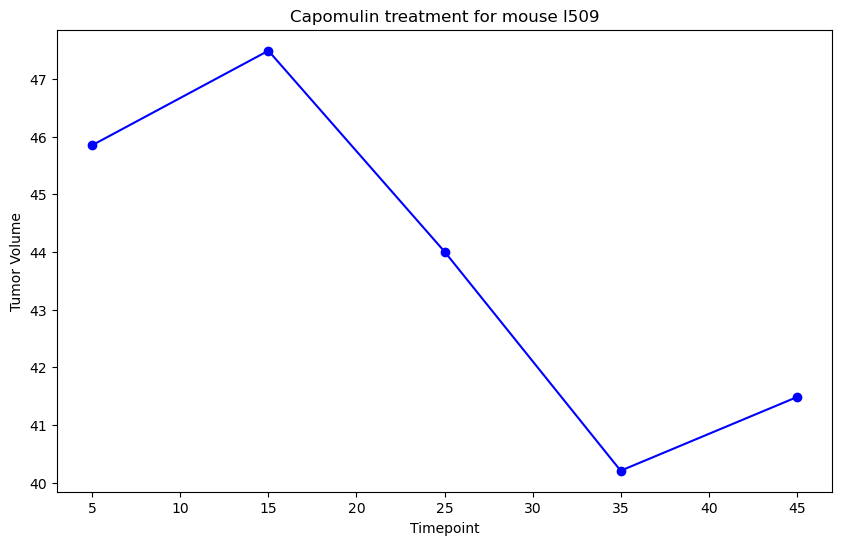

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

capomulin_data = clean_df[(clean_df['Timepoint']) & (clean_df['Mouse ID'] == mouse_id)]


plt.figure(figsize=(10,6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Capomulin treatment for mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()



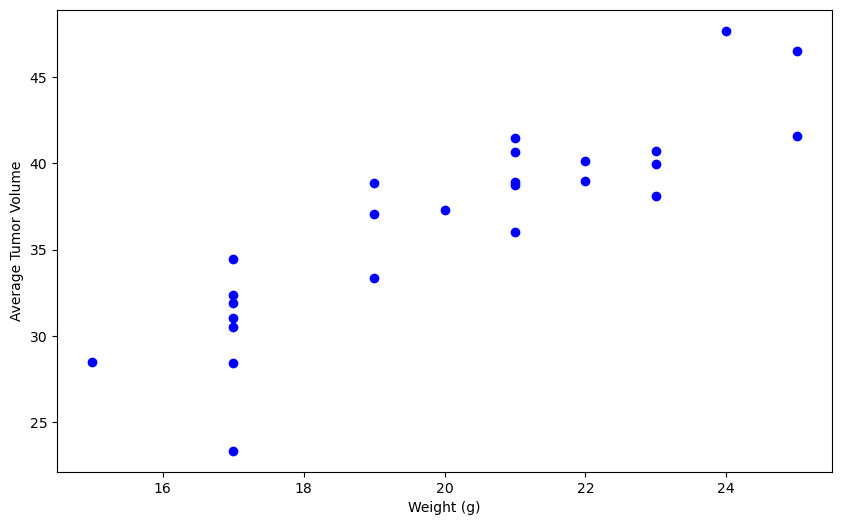

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_scatter.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', alpha=1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8767060403658118
Slope: [1.75046823], Intercept: [1.44814695]


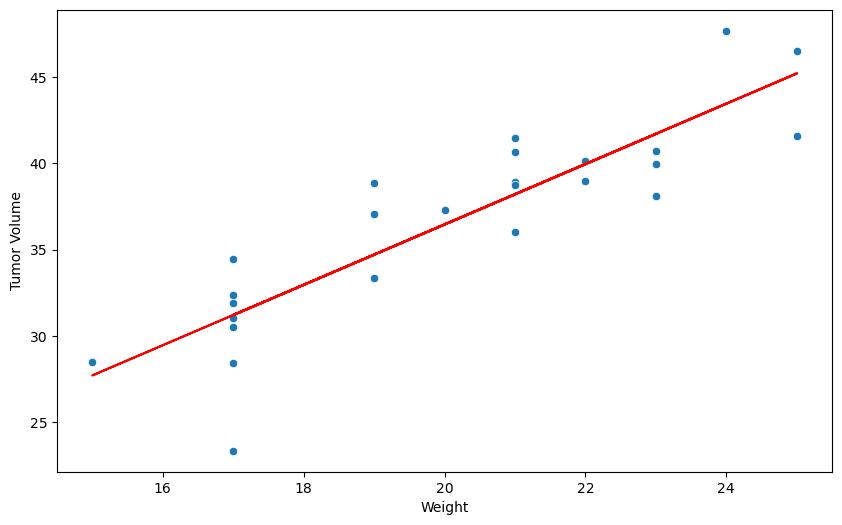

In [169]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_correlation = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']
correlation = capomulin_correlation['Weight (g)'].corr(capomulin_correlation['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation}")

X = capomulin_correlation[['Weight (g)']]
y = capomulin_correlation[['Tumor Volume (mm3)']]
model = LinearRegression()
model.fit(X,y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=capomulin_correlation)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()